# Demand Predictive Modeling

## Objective
The objective of this study is to construct a predictive model for demand forecasting by leveraging historical sales data in conjunction with temporal and categorical features. The analysis seeks to enhance the accuracy of demand estimation, thereby facilitating more informed inventory management decisions. This approach aims to contribute to the reduction of supply chain inefficiencies and support data-driven planning in inventory control systems.

## About Dataset

This dataset follows the format of the Retail Store Inventory Forecasting Dataset and corrects mislabeled entries such as store and product IDs. Additionally, it includes an Epidemic feature to simulate retail conditions during the COVID-19 pandemic period, enhancing the realism and practical value of the data. These improvements are aimed at making the dataset more suitable for time series forecasting tasks.

* **Date**: Date of the record.
* **Store ID**: Unique identifier for the store.
* **Product ID**: Unique identifier for the product.
* **Category**: Product category.
* **Region**: Geographical region of the store.
* **Inventory Level**: Units available in stock.
* **Units Sold**: Units sold on that day.
* **Units Ordered**: Units ordered for restocking.
* **Price**: Product price.
* **Discount**: Discount applied, if any.
* **Weather Condition**: Weather on the day of the record.
* **Promotion**: 1 if there was a promotion, 0 otherwise.
* **Competitor Pricing**: Price of a similar product from a competitor.
* **Seasonality**: Season (e.g., Winter, Spring).
* **Epidemic**: 1 if an epidemic occurred, 0 otherwise.
* **Demand**: Daily estimated demand for the product

## Importing the Necessary Packages

In [ ]:
# Importing Data Manipulation Packagaes
import pandas as pd
import numpy as np

# Importing Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Importing the Necessary Dataset

In [ ]:
# Importing the Dataset
df = pd.read_csv('sales_data.csv')
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


## Data Overview

In [ ]:
# Data Shape
df.shape

(76000, 16)

In [ ]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [ ]:
# Looking at the categorical values
categorical = df.select_dtypes(exclude=np.number)
df[categorical.columns].nunique().sort_values(ascending=False)

,0
Date,760
Product ID,20
Store ID,5
Category,5
Region,4
Weather Condition,4
Seasonality,4


In [ ]:
# Unique Values within each Categorical Column
for col in categorical.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print()

Unique values in column 'Date':
['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04'
 '2022-02-05' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-10' '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14'
 '2022-02-15' '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19'
 '2022-02-20' '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24'
 '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01'
 '2022-03-02' '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06'
 '2022-03-07' '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11'
 '2022-03-12' '2022-03-13' '2022-03-14' '202

In [ ]:
# Data Summary for Numerical
numerical = df.select_dtypes(include=['int64', 'float64'])
df[numerical.columns].describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


In [ ]:
# Data Summary for Categorical
df[categorical.columns].describe()

,Date,Store ID,Product ID,Category,Region,Weather Condition,Seasonality
count,76000,76000,76000,76000,76000,76000,76000
unique,760,5,20,5,4,4,4
top,2024-01-30,S001,P0001,Groceries,North,Cloudy,Winter
freq,100,15200,3800,30400,30400,24360,21000


In [ ]:
# Converting the Date column to Datetime
df['Date'] = pd.to_datetime(df['Date'])

## Visualization

### Univariate Analysis


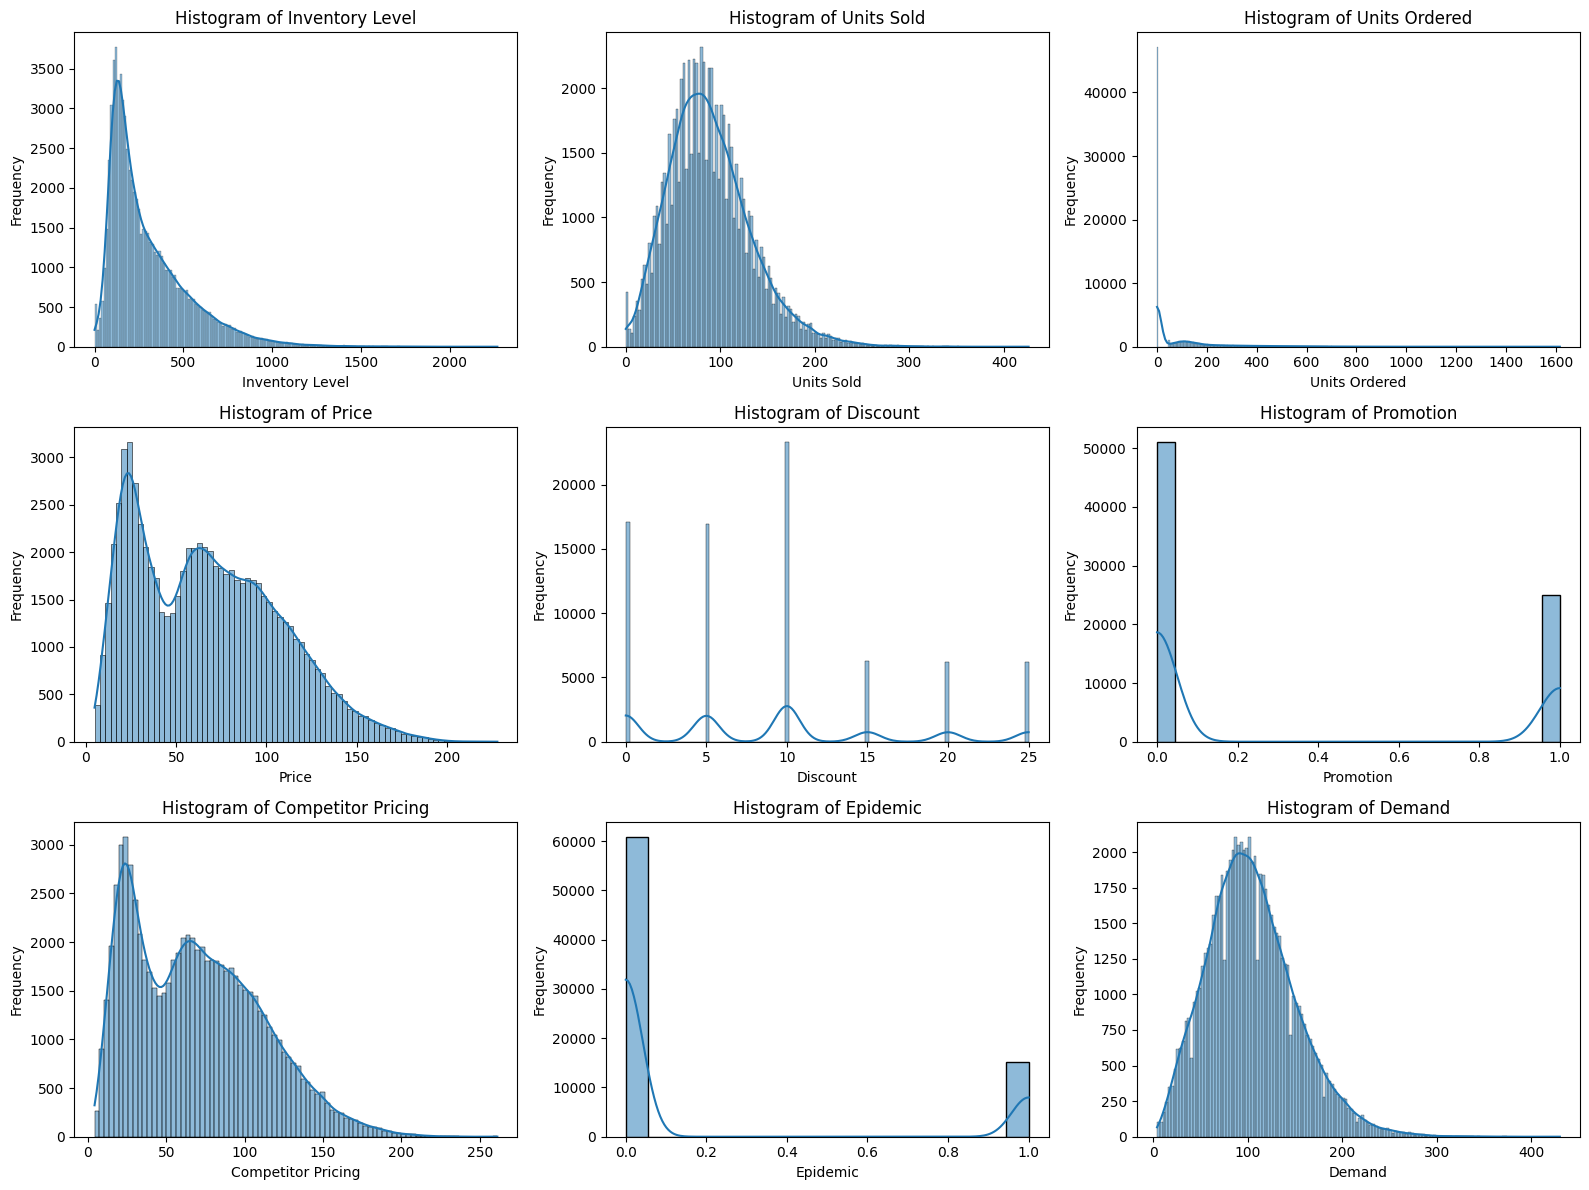

In [ ]:
# Making histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)  # Arrange plots in a 3x3 grid
    sns.histplot(df[col],kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()

<ipython-input-11-74bad09c26d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-11-74bad09c26d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-11-74bad09c26d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
<ipython-input-11-74bad09c26d2>:10: FutureWarning: 

Passing `palette` without ass

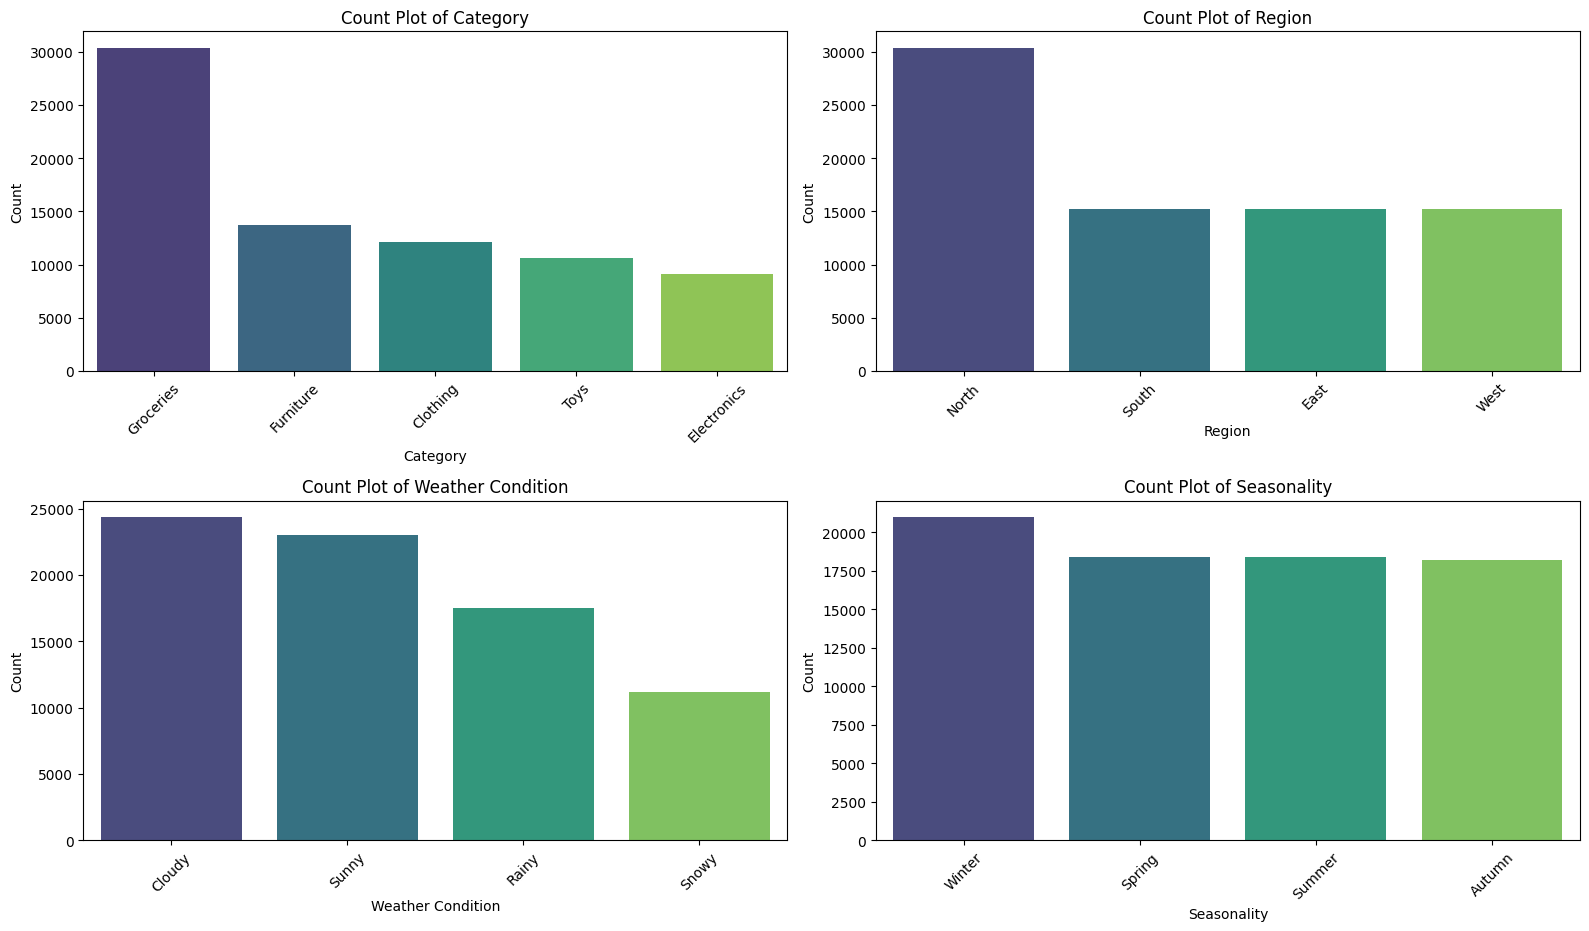

In [ ]:
# Making Boxplots for Categorical Variables

# Redefining the categorical DataFrame to exclude the Prod ID, Store ID, and Date
categorical = df.select_dtypes(exclude=np.number).drop(['Product ID', 'Store ID', 'Date'], axis=1)

# Plotting Boxplots
plt.figure(figsize=(16, 18))
for i, col in enumerate(categorical, 1):
    plt.subplot(4, 2, i)  # 4x2 grid for up to 8 categorical variables
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### Bivariate Analysis

### Correlation Heatmap

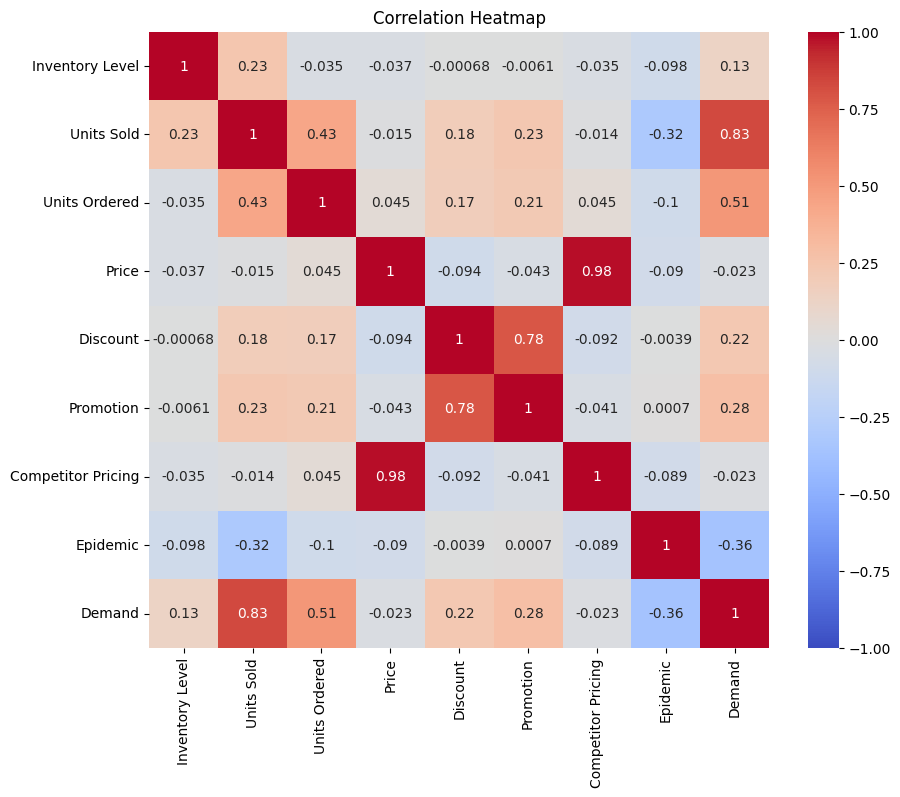

In [ ]:
# Making Correlation for Numerical Variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical.columns].corr(), annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Time-Based Visualizations

In [ ]:
# Extracting Month, Week, and Year

df['Month'] = df['Date'].dt.to_period('M').astype(str)
df['Weekday'] = df['Date'].dt.to_period('W').astype(str)
df['Year'] = df['Date'].dt.to_period('Y').astype(str)

df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand,Month,Weekday,Year
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115,2022-01,2021-12-27/2022-01-02,2022
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229,2022-01,2021-12-27/2022-01-02,2022
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157,2022-01,2021-12-27/2022-01-02,2022
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52,2022-01,2021-12-27/2022-01-02,2022
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59,2022-01,2021-12-27/2022-01-02,2022


<ipython-input-14-104e005ede20>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Date', y='Demand', color='blue', label='Demand',ci=False)
<ipython-input-14-104e005ede20>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Date', y='Inventory Level', color='red', label='Inventory Level',ci=False)


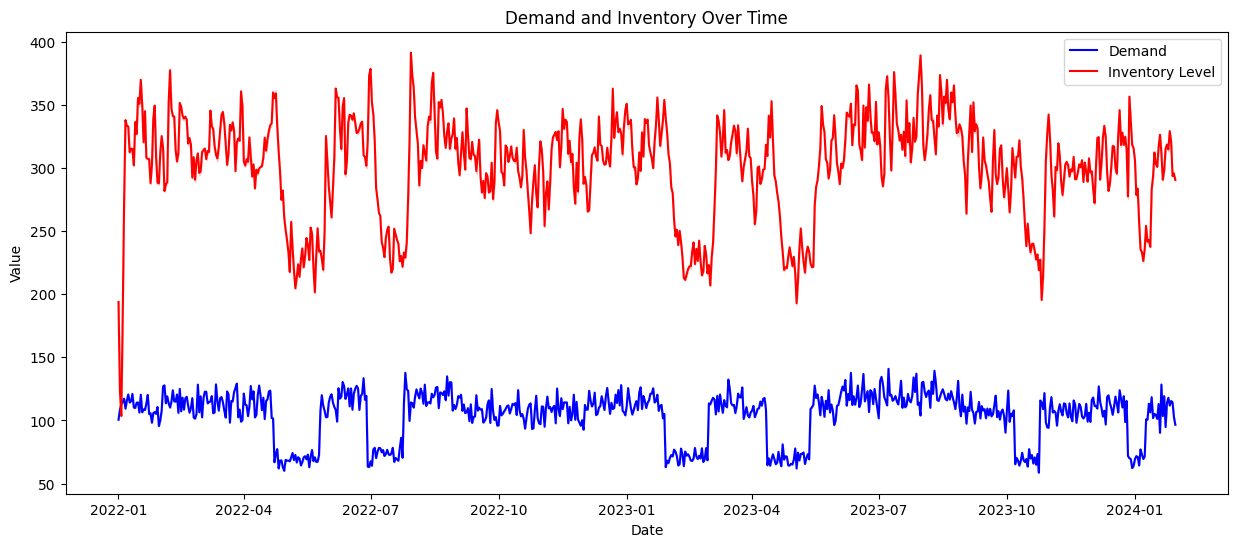

In [ ]:
# Analyzing Demand over Inventory
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Date', y='Demand', color='blue', label='Demand',ci=False)
sns.lineplot(data=df, x='Date', y='Inventory Level', color='red', label='Inventory Level',ci=False)
plt.title('Demand and Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

<ipython-input-15-27c32221b059>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Month', y='Demand', color='blue', label='Demand',ci=False)
<ipython-input-15-27c32221b059>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Month', y='Inventory Level', color='red', label='Inventory Level',ci=False)


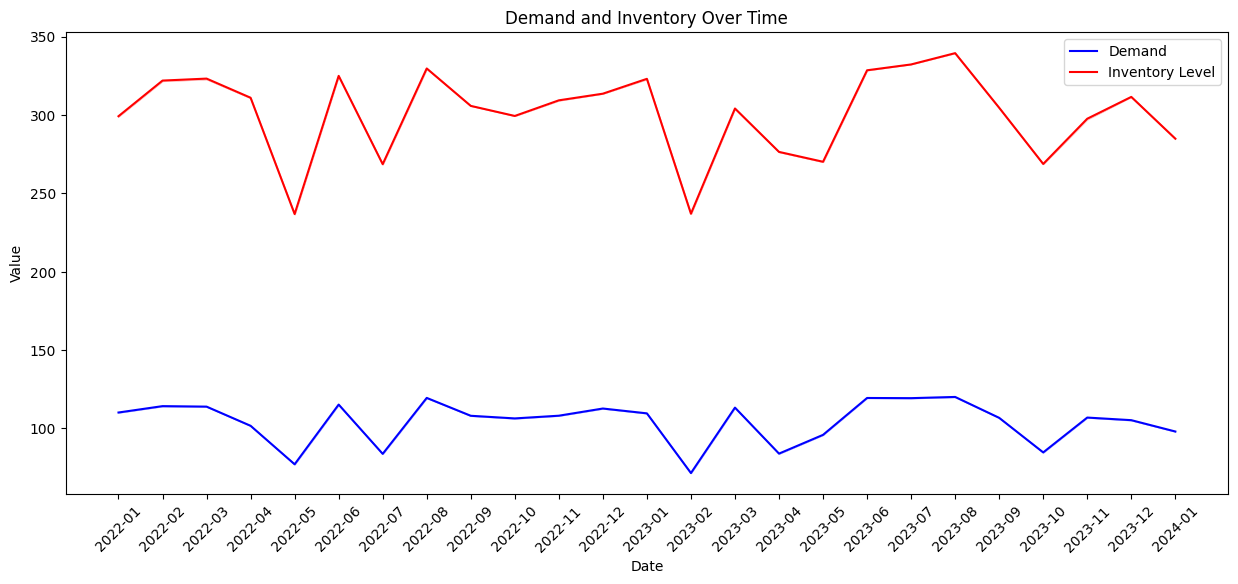

In [ ]:
# Monthly Overview
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Month', y='Demand', color='blue', label='Demand',ci=False)
sns.lineplot(data=df, x='Month', y='Inventory Level', color='red', label='Inventory Level',ci=False)
plt.title('Demand and Inventory Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Product and Category Insights

<ipython-input-16-c3485280957c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Demand', palette='viridis',order=df.groupby('Category')['Demand'].mean().sort_values(ascending=False).index)


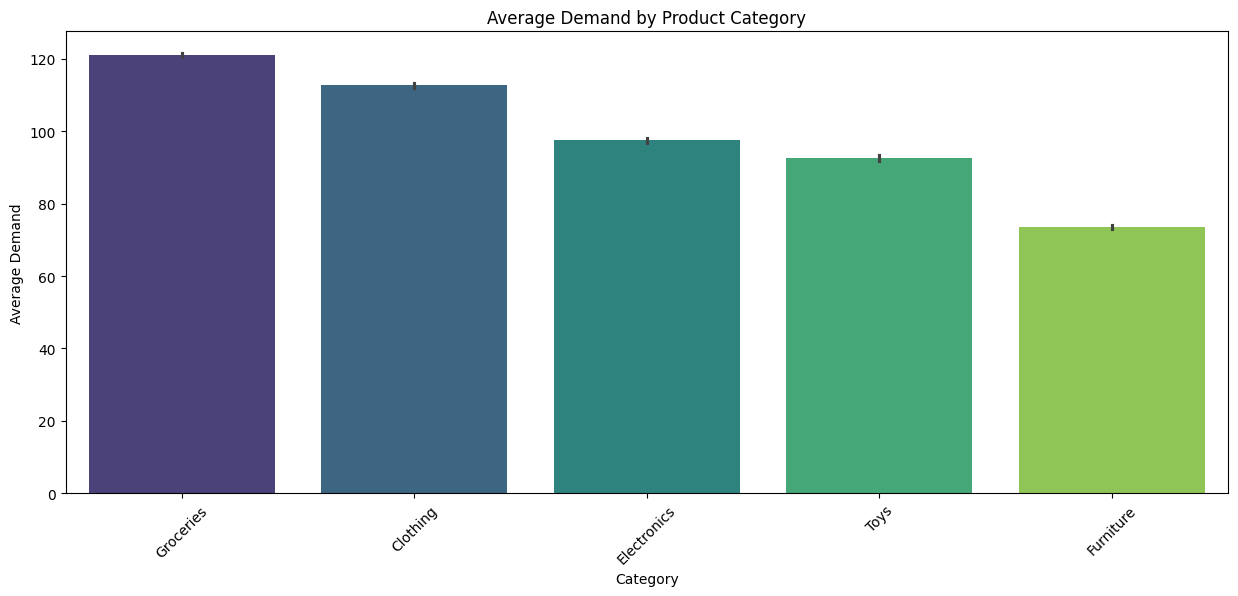

In [ ]:
# Average Demand by Product Category
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Category', y='Demand', palette='viridis',order=df.groupby('Category')['Demand'].mean().sort_values(ascending=False).index)
plt.title('Average Demand by Product Category')
plt.xlabel('Category')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-ba0404d96b23>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Region', y='Inventory Level', palette='viridis',order=df.groupby('Region')['Inventory Level'].mean().sort_values(ascending=False).index)


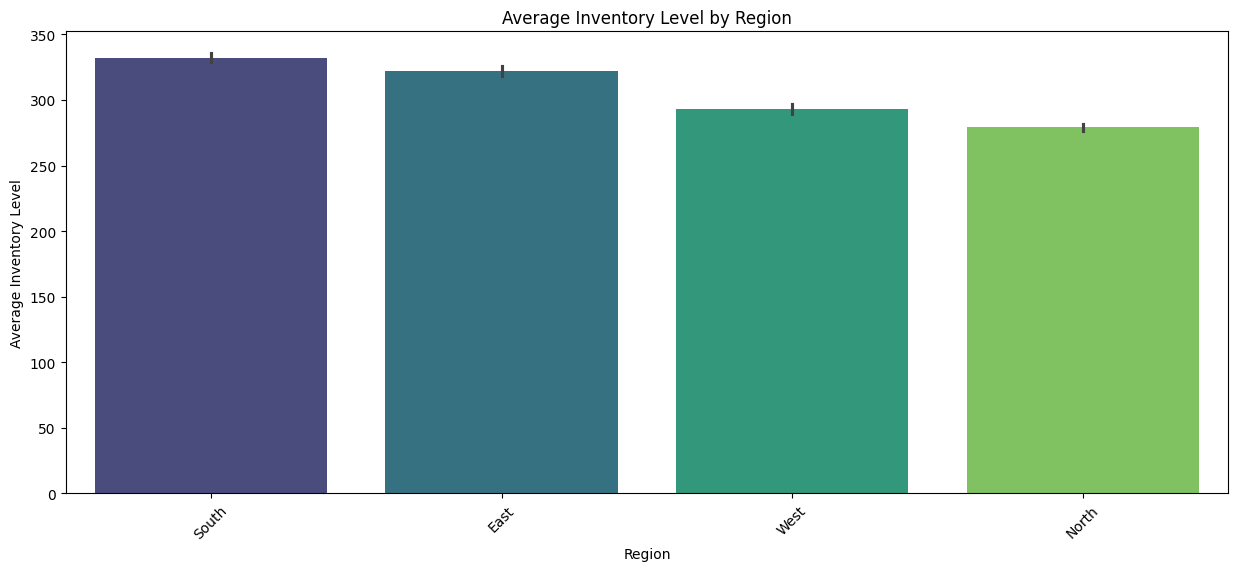

In [ ]:
# Average Inventory Level by Region
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Region', y='Inventory Level', palette='viridis',order=df.groupby('Region')['Inventory Level'].mean().sort_values(ascending=False).index)
plt.title('Average Inventory Level by Region')
plt.xlabel('Region')
plt.ylabel('Average Inventory Level')
plt.xticks(rotation=45)
plt.show()

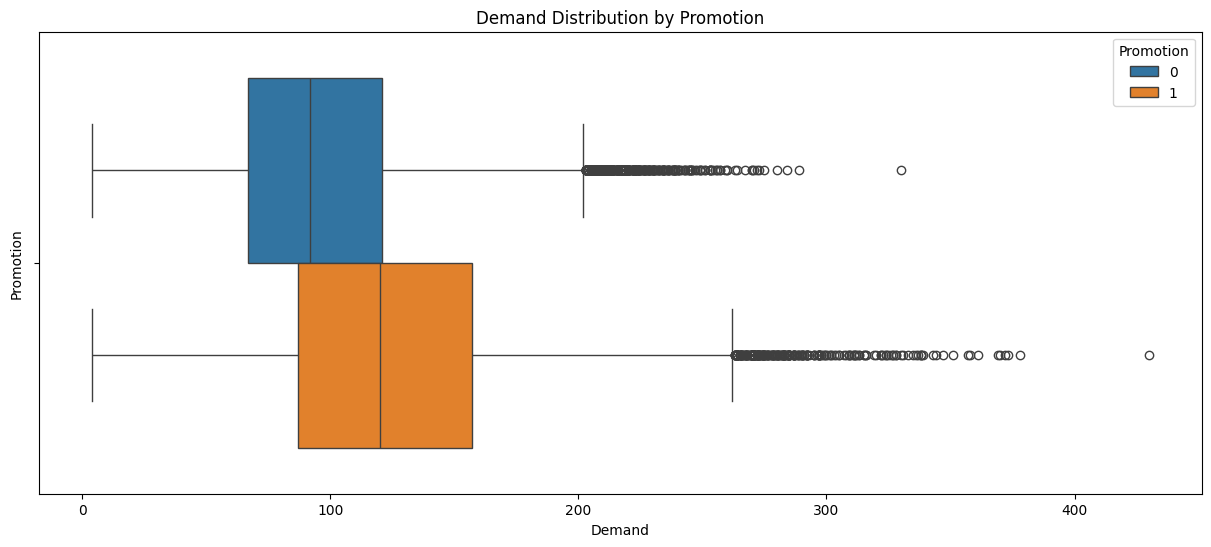

In [ ]:
# Demand Distribution by Promotion
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Demand',hue='Promotion')
plt.title('Demand Distribution by Promotion')
plt.xlabel('Demand')
plt.ylabel('Promotion')
plt.show()

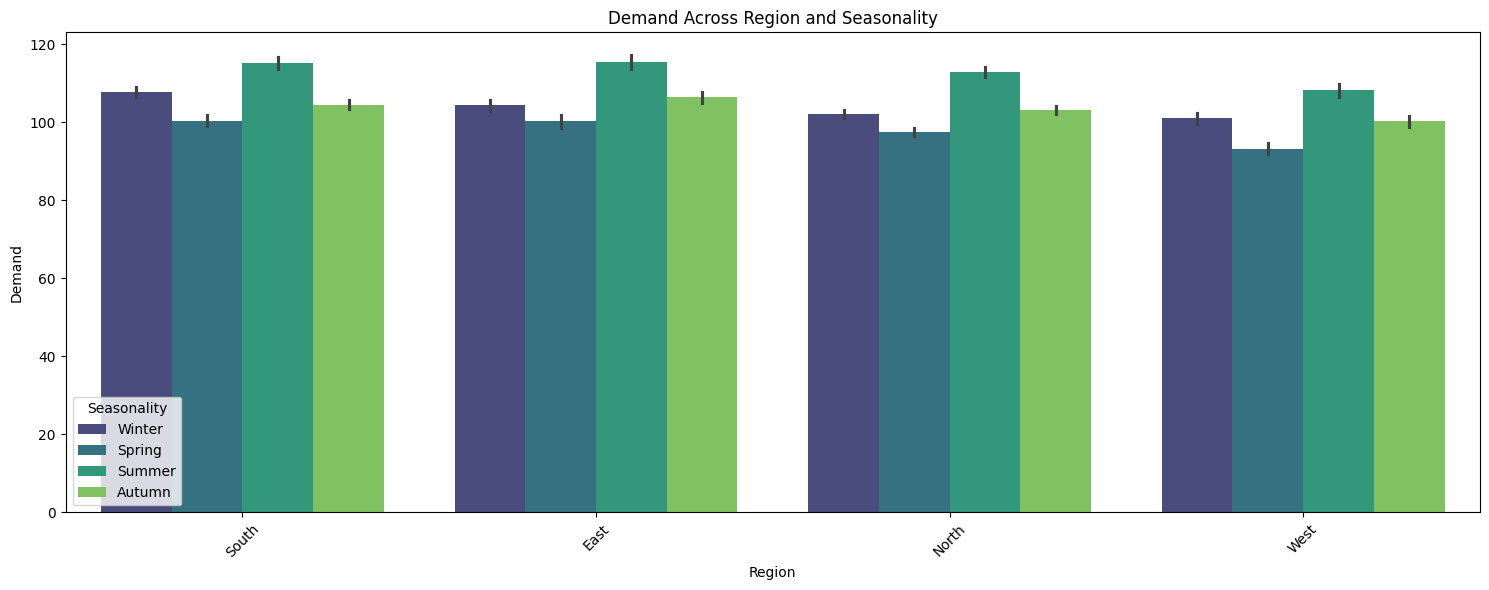

In [ ]:
# Demand Across Region and Seasonality Bar Chart
plt.figure(figsize=(15, 6))
sns.barplot(
    data=df,
    x='Region',
    y='Demand',
    hue='Seasonality',
    palette='viridis',
    order=df.groupby('Region')['Demand'].mean().sort_values(ascending=False).index
)
plt.title('Demand Across Region and Seasonality')
plt.xlabel('Region')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.legend(title='Seasonality')
plt.tight_layout()
plt.show()


### Looking at Units Sold

<ipython-input-20-e85e1df37a99>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='Date', y='Units Sold', color='blue', label='Units Sold',ci=False)


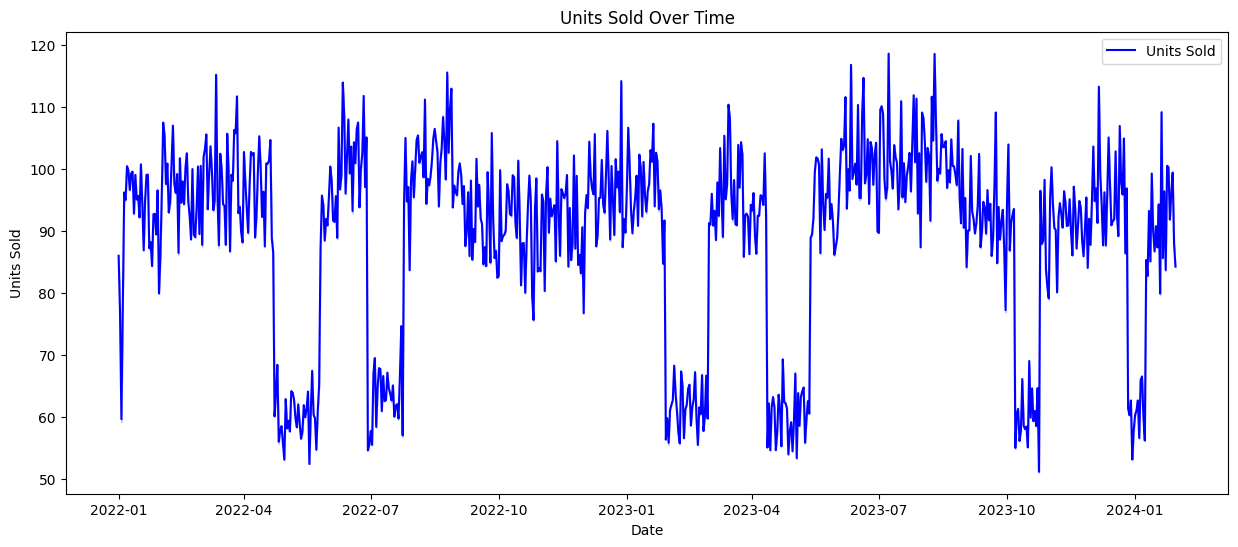

In [ ]:
# Units Sold Overtime
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Date', y='Units Sold', color='blue', label='Units Sold',ci=False)
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

<ipython-input-21-0ea5ef8238fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Category', y='Units Sold', palette='viridis',order=df.groupby('Category')['Units Sold'].mean().sort_values(ascending=False).index)


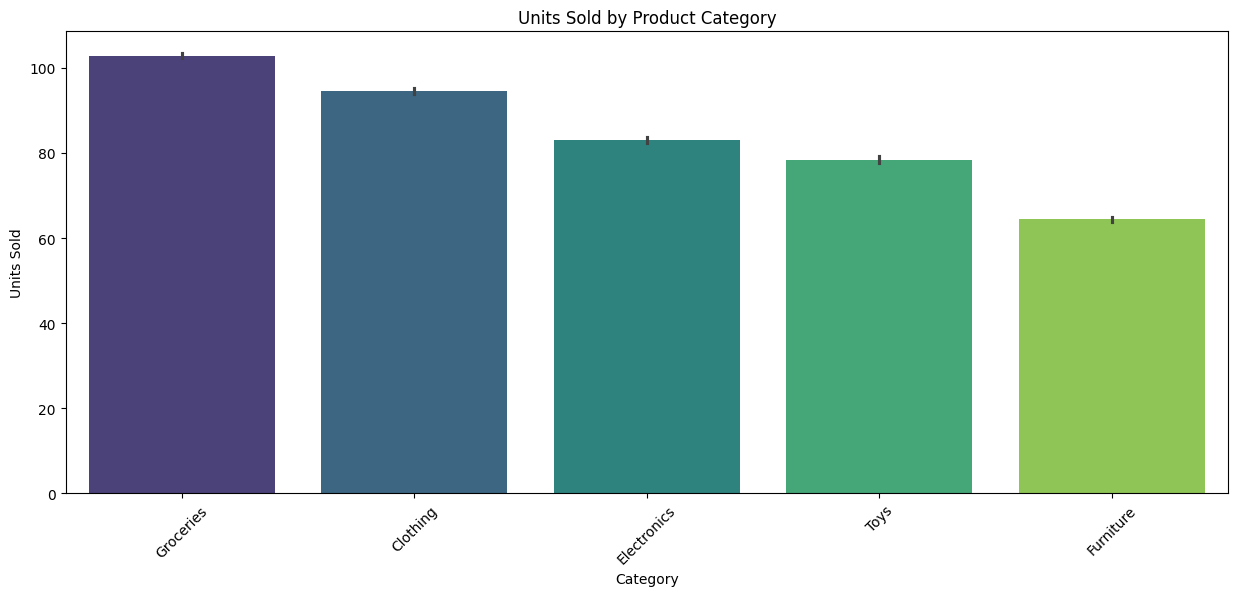

In [ ]:
# Units Sold based on Product Category
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Category', y='Units Sold', palette='viridis',order=df.groupby('Category')['Units Sold'].mean().sort_values(ascending=False).index)
plt.title('Units Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

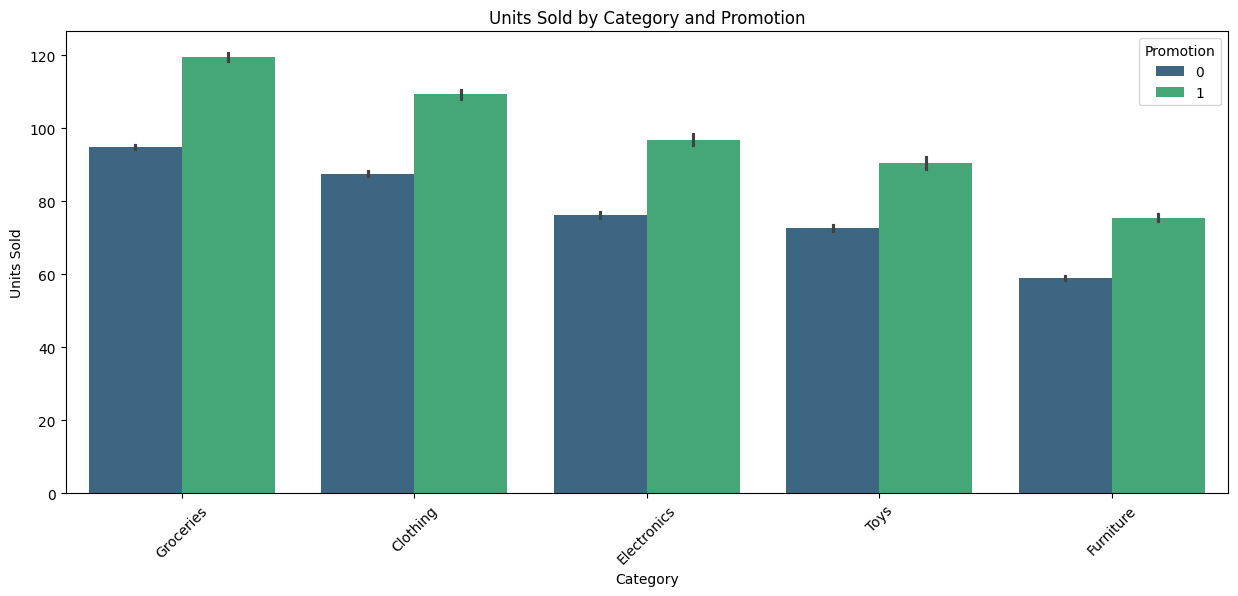

In [ ]:
# Units Sold By Category for Promotion
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Category', y='Units Sold', hue='Promotion', palette='viridis',order=df.groupby('Category')['Units Sold'].mean().sort_values(ascending=False).index)
plt.title('Units Sold by Category and Promotion')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Promotion')
plt.show()

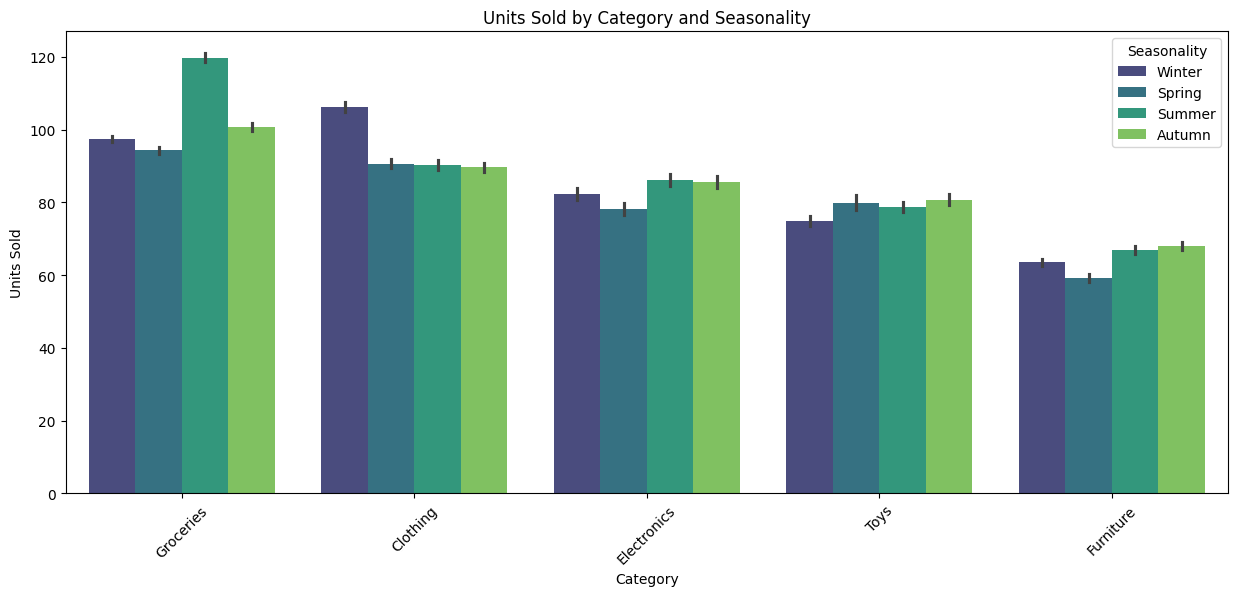

In [ ]:
# The Category are there mostly dependent upon Seasonality
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Category', y='Units Sold', hue='Seasonality', palette='viridis',order=df.groupby('Category')['Units Sold'].mean().sort_values(ascending=False).index)
plt.title('Units Sold by Category and Seasonality')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Seasonality')
plt.show()

### Comparing Competitor Pricing vs Pricing

In [ ]:
# Pricing and Comeptitor Pricing based on Category Groupby Highlight
(df.groupby(['Category','Seasonality'])[['Price', 'Competitor Pricing']]
 .mean()
 .sort_values(by='Price', ascending=False)
 .style.background_gradient(cmap='viridis'))

## Model Building

### Data Preprocessing

In [ ]:
# Dataset
sales = pd.read_csv('sales_data.csv', parse_dates=['Date'])

# Data Preprocessing
sales['Month'] = sales['Date'].dt.month
sales['Year'] = sales['Date'].dt.year
sales['Day'] = sales['Date'].dt.day
sales['Week'] = sales['Date'].dt.isocalendar().week
sales['Weekday'] = sales['Date'].dt.weekday
sales['IsWeekend'] = sales['Date'].dt.weekday.isin([5, 6]).astype(int)

# Drop 'Date' column safely
sales.drop(['Date','Product ID','Store ID'], axis=1, inplace=True)

# Separate features (X) and target (y)
X = sales.drop('Demand', axis=1)
y = sales['Demand']

# Encode categorical variables if any
X = pd.get_dummies(X, drop_first=True, dtype=int)

# Final check
print(X.head())

   Inventory Level  Units Sold  Units Ordered  Price  Discount  Promotion  \
0              195         102            252  72.72         5          0   
1              117         117            249  80.16        15          1   
2              247         114            612  62.94        10          1   
3              139          45            102  87.63        10          0   
4              152          65            271  54.41         0          0   

   Competitor Pricing  Epidemic  Month  Year  ...  Category_Toys  \
0               85.73         0      1  2022  ...              0   
1               92.02         0      1  2022  ...              0   
2               60.08         0      1  2022  ...              0   
3               85.19         0      1  2022  ...              0   
4               51.63         0      1  2022  ...              0   

   Region_North  Region_South  Region_West  Weather Condition_Rainy  \
0             1             0            0               

In [ ]:
# Getting training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((60800, 27), (15200, 27))

In [ ]:
# Metrics
def evaluate_model(model,predictors,target):
    y_pred = model.predict(predictors)
    mae = mean_absolute_error(target, y_pred) # MAE
    mse = mean_squared_error(target, y_pred) # MSE
    rmse = np.sqrt(mse) # RMSE
    r2 = r2_score(target, y_pred) # R-squared
    adj_r2 = 1 - (1 - r2) * (len(target) - 1) / (len(target) - X.shape[1] - 1) #Adjuted R2

    # DataFrame
    results = pd.DataFrame([mae, mse, rmse, r2, adj_r2],
                           index=['MAE', 'MSE', 'RMSE', 'R2', 'Adj R2'],
                           columns=['Scores']).T
    return results

### Model Building

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model(lr,X_test,y_test)

,MAE,MSE,RMSE,R2,Adj R2
Scores,16.374574,481.77441,21.94936,0.781856,0.781468


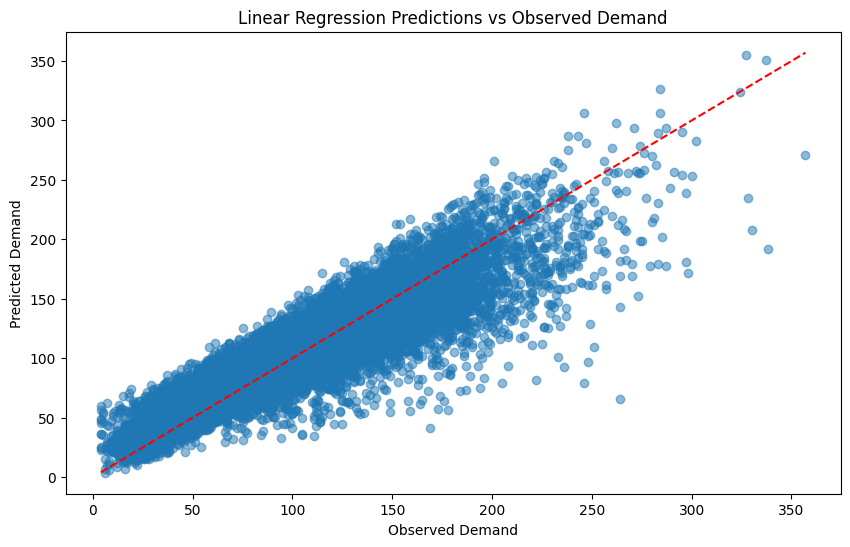

In [ ]:
# Predictions vs Observed for linear regression Graphed
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr.predict(X_test), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Observed Demand')
plt.ylabel('Predicted Demand')
plt.title('Linear Regression Predictions vs Observed Demand')
plt.show()

In [ ]:
# XG Boost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
evaluate_model(xgb,X_test,y_test)

,MAE,MSE,RMSE,R2,Adj R2
Scores,12.380975,268.717255,16.392598,0.878327,0.87811


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

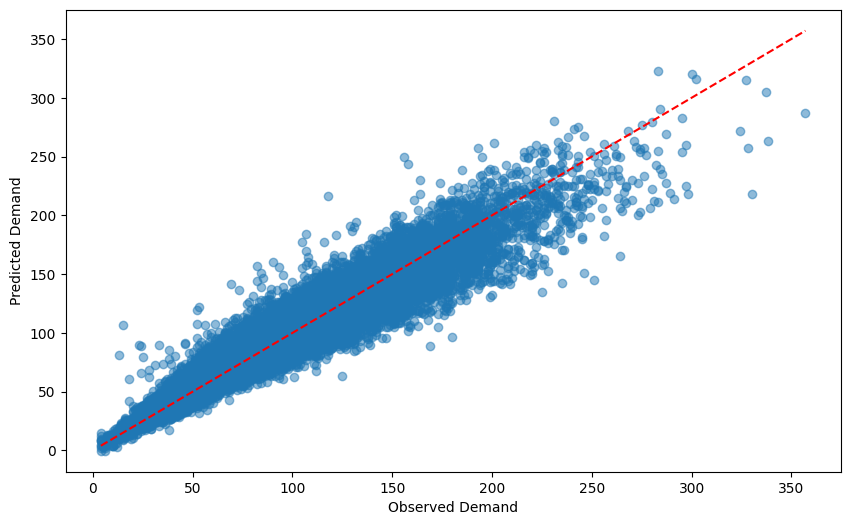

In [ ]:
# Predictions vs Observed for XGBoost Graphed
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb.predict(X_test), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Observed Demand')
plt.ylabel('Predicted Demand')
plt

### Feature Importance

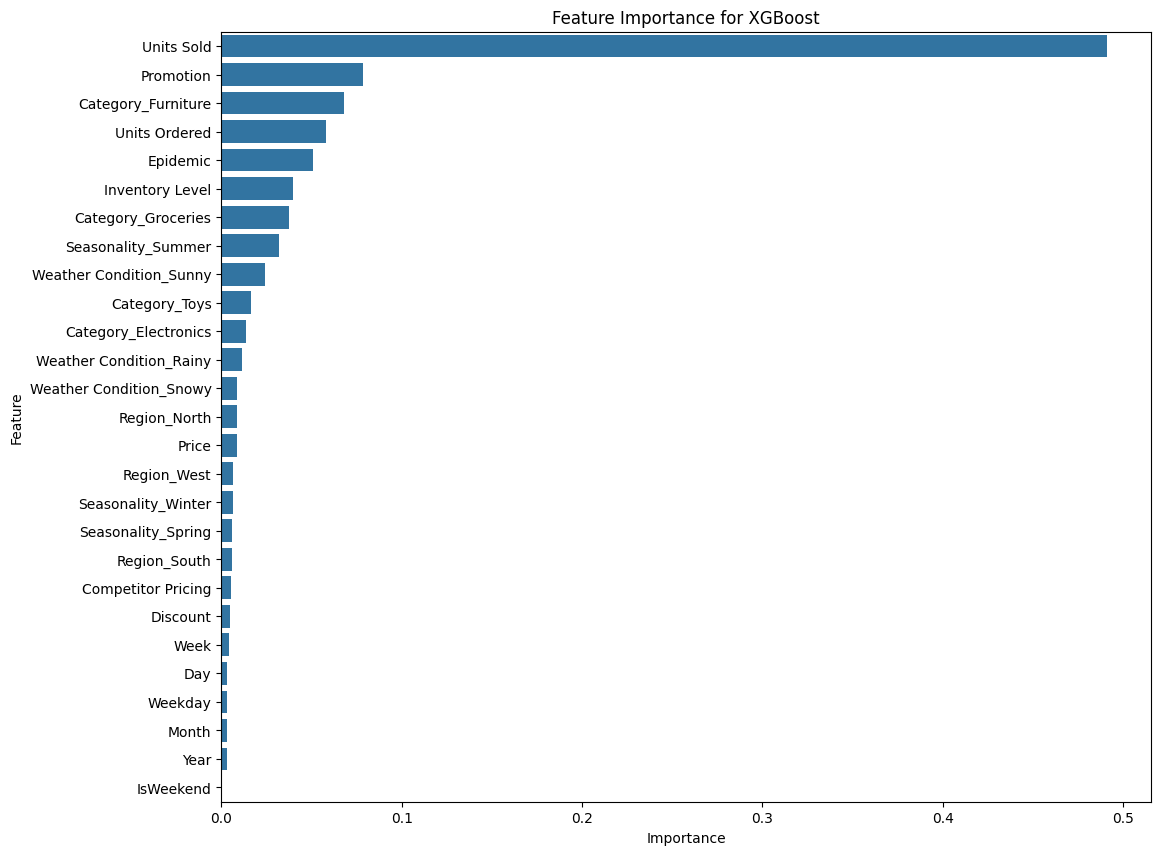

In [ ]:
# Feature Importance for XgBoost
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for XGBoost')
plt.show()